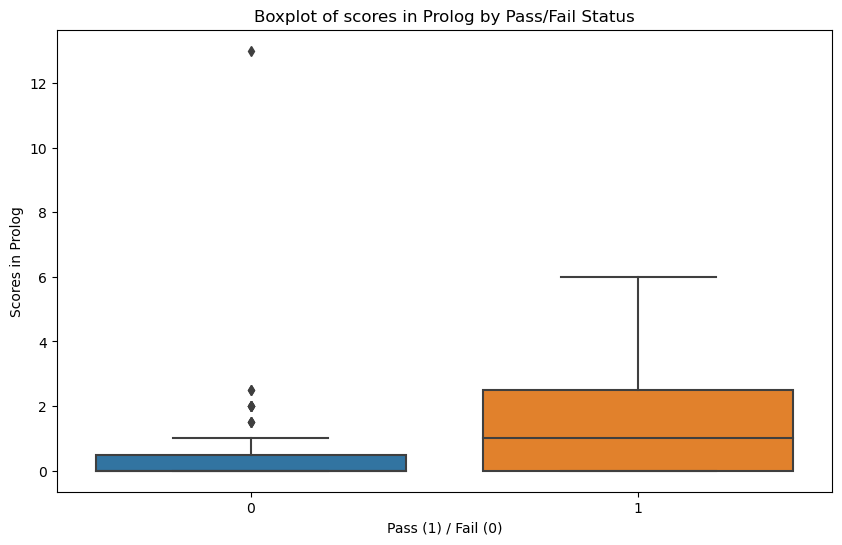

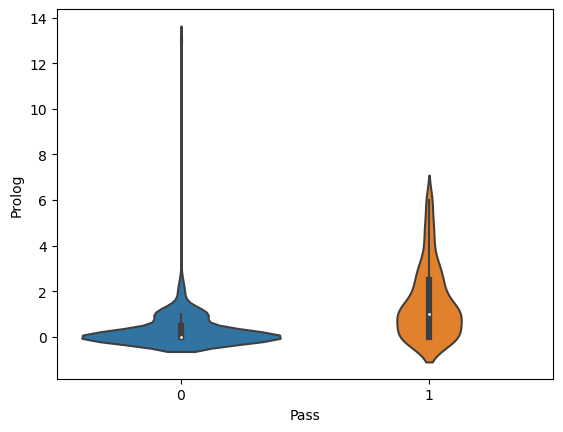

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it already includes 'Pass' as a binary indicator (0 = fail, 1 = pass)
# and Hardest as the scores for the first subject.
# Load your data
Hardest = 'Prolog'
Easiest = ''
data = pd.read_excel('C:/Users/Prachi/Documents/Data Science Masters/Thesis/student_score_per_topic_with_total.xlsx')

# Convert all score columns to numeric (assuming score columns are named 'Score1', 'Score2', ...)
score_columns = [col for col in data.columns if 'Total' not in col]
data[score_columns] = data[score_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values with the mean (or zero, or median)
data[score_columns] = data[score_columns].fillna(data[score_columns].mean())

# Create a binary 'Pass' column based on the passing percentage, e.g., 40%
passing_score = 34
data['Pass'] = (data['Total'] >= passing_score).astype(int)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pass', y=Hardest, data=data)
plt.title('Boxplot of scores in Prolog by Pass/Fail Status')
plt.xlabel('Pass (1) / Fail (0)')
plt.ylabel('Scores in Prolog')
plt.show()

# You can also use a violin plot to see the distribution more clearly
sns.violinplot(x='Pass', y=Hardest, data=data)
plt.show()


In [14]:
from scipy.stats import ttest_ind

# Split the data into pass and fail groups
Hardest = 'Prolog'
pass_group = data[data['Pass'] == 1][Hardest]
fail_group = data[data['Pass'] == 0][Hardest]

# Perform a t-test between the groups
t_stat, p_value = ttest_ind(pass_group, fail_group, equal_var=False)
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

# Interpret the p-value
if p_value < 0.05:
    print("There is a statistically significant difference in Prolog scores between pass and fail groups.")
else:
    print("There is no statistically significant difference in Prolog scores between pass and fail groups.")


T-test result: t-statistic = 9.333685557156373, p-value = 2.0695671504601612e-18
There is a statistically significant difference in Prolog scores between pass and fail groups.


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for logistic regression
X = data[[Hardest]]  # Using only Prolog as the predictor
y = data['Pass']

# First split: 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: 50% of remaining data for validation, 50% for testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of regularization)
    'penalty': ['l1', 'l2'],        # L1 and L2 regularization
    'solver': ['liblinear']         # Solver to use (liblinear supports both L1 and L2)
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Validate the model using the best hyperparameters on the validation set
best_model = grid_search.best_estimator_
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation accuracy with tuned hyperparameters: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val, val_predictions))

# Test the model on the test set
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test accuracy with tuned hyperparameters: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Validation accuracy with tuned hyperparameters: 0.8111111111111111
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82        49
           1       0.79      0.80      0.80        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90

Test accuracy with tuned hyperparameters: 0.7111111111111111
Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        50
           1       0.69      0.62      0.66        40

    accuracy                           0.71        90
   macro avg       0.71      0.70      0.70        90
weighted avg       0.71      0.71      0.71        90



In [16]:
# After tuning, retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Coefficients of the best logistic regression model
coefficients = best_model.coef_

# Logistic regression also has an intercept term (bias)
intercept = best_model.intercept_

# Print the coefficients and intercept
print(f"Coefficients of the best model: {coefficients}")
print(f"Intercept of the best model: {intercept}")


Coefficients of the best model: [[0.25204305]]
Intercept of the best model: [-0.18481919]
